In [3]:
import pandas as pd

In [4]:
pwd

'/Users/luna/Desktop/data_science/exercises/lab_2'

In [5]:
data = pd.read_csv("NationalNames.csv", index_col="Id")

/Users/luna/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
data.head()


,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825433 entries, 1 to 1825433
Data columns (total 4 columns):
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(2), object(2)
memory usage: 69.6+ MB


In [8]:
data.shape


(1825433, 4)

In [9]:
data[['Name', 'Count']]

,Name,Count
Id,,
1,Mary,7065
2,Anna,2604
3,Emma,2003
4,Elizabeth,1939
5,Minnie,1746
...,...,...
1825429,Zykeem,5
1825430,Zymeer,5
1825431,Zymiere,5


In [10]:
row_list = [1,15,100,1000]
col_list = ['Name', 'Gender']

In [11]:
data.loc[row_list, col_list]

,Name,Gender
Id,,
1,Mary,F
15,Cora,F
100,Emily,F
1000,Ben,M


In [12]:
data.loc[row_list,]

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
15,Cora,1880,F,1045
100,Emily,1880,F,210
1000,Ben,1880,M,305


In [13]:
mask = data['Count'] > 90000

In [15]:
mask.value_counts()

False    1825425
True           8
Name: Count, dtype: int64

In [16]:
data.loc[mask,:]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
437158,James,1947,M,94755
437159,Robert,1947,M,91642
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010
533140,Michael,1956,M,90633
544603,Michael,1957,M,92709
556177,Michael,1958,M,90519


In [17]:
mask = (data['Count'] > 90000) & (data['Gender'] == 'F')

In [18]:
data.loc[mask,:]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010


In [19]:
data['Count'].mean()

184.68792116719703

In [21]:
data['Count'][data['Gender'] == 'M'].mean()

228.6587549579832

In [26]:
data.loc[data['Gender'] == 'M', 'Count'].mean()

228.6587549579832

In [28]:
# Create new columns based on current values (same file)
count_col = data['Count']

In [29]:
count_sum = data['Count'].sum()

In [30]:
data['CountPercent'] = (count_col / count_sum) * 100

In [31]:
data.head()

,Name,Year,Gender,Count,CountPercent
Id,,,,,
1,Mary,1880,F,7065,0.002096
2,Anna,1880,F,2604,0.000772
3,Emma,1880,F,2003,0.000594
4,Elizabeth,1880,F,1939,0.000575
5,Minnie,1880,F,1746,0.000518


In [32]:
# Sorting
data.sort_values(by='Count', ascending=True) # To reverse the ascending, change to False

,Name,Year,Gender,Count,CountPercent
Id,,,,,
1825433,Zyrin,2014,M,5,0.000001
1001394,Kentrail,1986,M,5,0.000001
1001395,Kentrel,1986,M,5,0.000001
1001396,Kenyada,1986,M,5,0.000001
1001397,Kenzo,1986,M,5,0.000001
...,...,...,...,...,...
437159,Robert,1947,M,91642,0.027183
544603,Michael,1957,M,92709,0.027499
437158,James,1947,M,94755,0.028106


In [35]:
data['Count'][(data['Year'] == 1880) & (data['Gender'] == 'F')].mean()

Id
1      7065
2      2604
3      2003
4      1939
5      1746
       ... 
938       5
939       5
940       5
941       5
942       5
Name: Count, Length: 942, dtype: int64

In [36]:
data['Count'][(data['Year'] == 1880) & (data['Gender'] == 'M')].mean()

104.43383742911153

In [37]:
data_agg = data.groupby(['Year', 'Gender'])

In [38]:
data_agg

In [39]:
data_agg['Count'].mean()

Year  Gender
1880  F          96.595541
      M         104.433837
1881  F          98.031983
      M         101.048144
1882  F         104.912451
                   ...    
2012  M         132.907569
2013  F          90.945704
      M         134.275121
2014  F          92.766298
      M         136.036059
Name: Count, Length: 270, dtype: float64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
data_summary = data.groupby('Year')['Count'].mean()

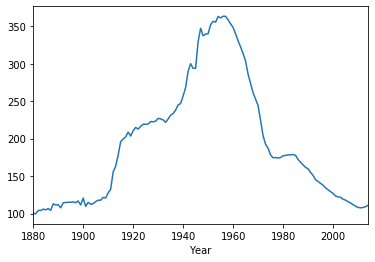

In [43]:
data_summary.plot()

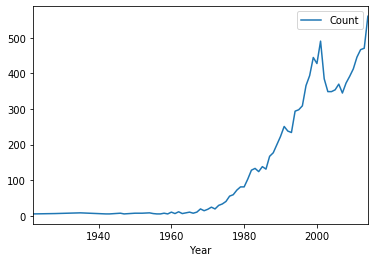

In [45]:
data[data.Name == 'Mohammed'].plot(x='Year', y='Count')